### sklearn.neighbors.KNeighborsClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
import numpy as np
from ..utils.fixes import _mode
from ..utils.extmath import weighted_mode
from ..utils.validation import _is_arraylike, _num_samples

import warnings
from ._base import _check_weights, _get_weights
from ._base import NeighborsBase, KNeighborsMixin, RadiusNeighborsMixin
from ..base import ClassifierMixin


### Parameters

    n_neighbors : int, default=5
        Number of neighbors to use by default for :meth:`kneighbors` queries.
    weights : {'uniform', 'distance'} or callable, default='uniform'
        Weight function used in prediction.  Possible values:
        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weights.
    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
        Algorithm used to compute the nearest neighbors:
        - 'ball_tree' will use :class:`BallTree`
        - 'kd_tree' will use :class:`KDTree`
        - 'brute' will use a brute-force search.
        - 'auto' will attempt to decide the most appropriate algorithm
          based on the values passed to :meth:`fit` method.
        Note: fitting on sparse input will override the setting of
        this parameter, using brute force.
    leaf_size : int, default=30
        Leaf size passed to BallTree or KDTree.  This can affect the
        speed of the construction and query, as well as the memory
        required to store the tree.  The optimal value depends on the
        nature of the problem.
    p : int, default=2
        Power parameter for the Minkowski metric. When p = 1, this is
        equivalent to using manhattan_distance (l1), and euclidean_distance
        (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
    metric : str or callable, default='minkowski'
        Metric to use for distance computation. Default is "minkowski", which
        results in the standard Euclidean distance when p = 2. See the
       
        If metric is "precomputed", X is assumed to be a distance matrix and
        must be square during fit. X may be a :term:`sparse graph`, in which
        case only "nonzero" elements may be considered neighbors.
        If metric is a callable function, it takes two arrays representing 1D
        vectors as inputs and must return one value indicating the distance
        between those vectors. This works for Scipy's metrics, but is less
        efficient than passing the metric name as a string.
    metric_params : dict, default=None
        Additional keyword arguments for the metric function.
   
### Attributes
    
    classes_ : array of shape (n_classes,)
        Class labels known to the classifier
    effective_metric_ : str or callble
        The distance metric used. It will be same as the `metric` parameter
        or a synonym of it, e.g. 'euclidean' if the `metric` parameter set to
        'minkowski' and `p` parameter set to 2.
    effective_metric_params_ : dict
        Additional keyword arguments for the metric function. For most metrics
        will be same with `metric_params` parameter, but may also contain the
        `p` parameter value if the `effective_metric_` attribute is set to
        'minkowski'.
    n_features_in_ : int
        Number of features seen during :term:`fit`.
        .. versionadded:: 0.24
    feature_names_in_ : ndarray of shape (`n_features_in_`,)
        Names of features seen during :term:`fit`. Defined only when `X`
        has feature names that are all strings.
        .. versionadded:: 1.0
    n_samples_fit_ : int
        Number of samples in the fitted data.
    outputs_2d_ : bool
        False when `y`'s shape is (n_samples, ) or (n_samples, 1) during fit
        otherwise True.
### See Also

    RadiusNeighborsClassifier: Classifier based on neighbors within a fixed radius.
    KNeighborsRegressor: Regression based on k-nearest neighbors.
    RadiusNeighborsRegressor: Regression based on neighbors within a fixed radius.
    NearestNeighbors: Unsupervised learner for implementing neighbor searches.
    
    .. warning::
       Regarding the Nearest Neighbors algorithms, if it is found that two
       neighbors, neighbor `k+1` and `k`, have identical distances
       but different labels, the results will depend on the ordering of the
       training data.
  
  
  
**fit()**:

     Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features) or \
            (n_samples, n_samples) if metric='precomputed'
        Training data.
    y : {array-like, sparse matrix} of shape (n_samples,) or \
            (n_samples, n_outputs)
        Target values.
    
                    
**predict()**:

    Parameters
    ----------
    X : array-like of shape (n_queries, n_features), \
            or (n_queries, n_indexed) if metric == 'precomputed'
        Test samples.
    Returns
    -------
    y : ndarray of shape (n_queries,) or (n_queries, n_outputs)
        Class labels for each data sample.
 **predict_proba()**:
 
    Parameters
    ----------
    X : array-like of shape (n_queries, n_features), \
            or (n_queries, n_indexed) if metric == 'precomputed'
        Test samples.
    Returns
    -------
    p : ndarray of shape (n_queries, n_classes), or a list of n_outputs \
            of such arrays if n_outputs > 1.
        The class probabilities of the input samples. Classes are ordered
        by lexicographic order.

In [ ]:
class KNeighborsClassifier(KNeighborsMixin, ClassifierMixin, NeighborsBase):
    """Classifier implementing the k-nearest neighbors vote.
    """

    def __init__(...):
        super().__init__(...)
        self.weights = weights

    def fit(self, X, y):
        """Fit the k-nearest neighbors classifier from the training dataset.
        """
        self.weights = _check_weights(self.weights)

        return self._fit(X, y)

    def predict(self, X):
        """Predict the class labels for the provided data.
        
        """
        1. for "uniform" weights we don''t need return_distance from self.kneighbors(X)
        2. store number of classs & make output 2D (shape=(-1,1))
        3. initalize y_pred (shape=(sample_length, class_length))
        4. for each classes calculated weighted mode (if weight present) + store them
            (use np.ravel() to make proper shape (-1,1 or 2D))
        
        return y_pred
        

    def predict_proba(self, X):
        """Return probability estimates for the test data X.
        """
        1. first 2 steps are same + if weights are none initalize them with ones
        2. normalize votes into real [0,1] probabilities + take extra care of dimensions
           as here we need to loop through n_neighbors to get proba_k[all_rows,idx]  
        3. take care of output dimensions
        return probabilities

    def _more_tags(self):
        return {"multilabel": True}



### Parameters

    radius : float, default=1.0
        Range of parameter space to use by default for :meth:`radius_neighbors`
        queries.
    
    outlier_label : {manual label, 'most_frequent'}, default=None
        Label for outlier samples (samples with no neighbors in given radius).
        - manual label: str or int label (should be the same type as y)
          or list of manual labels if multi-output is used.
        - 'most_frequent' : assign the most frequent label of y to outliers.
        - None : when any outlier is detected, ValueError will be raised.   
    **kwargs : dict
        Additional keyword arguments passed to the constructor.
        .. deprecated:: 1.0
            The RadiusNeighborsClassifier class will not longer accept extra
            keyword parameters in 1.2 since they are unused.
### Attributes

    outlier_label_ : int or array-like of shape (n_class,)
        Label which is given for outlier samples (samples with no neighbors
        on given radius).


In [ ]:
class RadiusNeighborsClassifier(RadiusNeighborsMixin, ClassifierMixin, NeighborsBase):
    """Classifier implementing a vote among neighbors within a given radius.
    """

    def __init__(...):
        # TODO: Remove in v1.2
        if len(kwargs) > 0:
            warnings.warn(...)
        super().__init__(...)
        self.weights = weights
        self.outlier_label = outlier_label

    def fit(self, X, y):
        """Fit the radius neighbors classifier from the training dataset.
        """
        self.weights = _check_weights(self.weights)
        self._fit(X, y)
        1. get classes & y
        2. some hyperparameter checking
            1. check if outlier_label is None or 
            2. elif "most_frequent" use bincount on _y[:,k] to get outlier_label
            3. else outlier_label depends on number of classes , check for consistency
                in output length & instances
        3. for each classes & oulier_label check dtype & scalar + store outlier_label
        
        return self

    def predict(self, X):
        """Predict the class labels for the provided data.
        """

        probs = self.predict_proba(X)
        1. store classes, check if output is 2D or not
        2. initalize y_pred calculate value take max probability index for each class
           if there is any non_zero for outlier_zero_probs take into account
        3. a dimension check to amke sure it''s 2D , use ravel()
        
        return y_pred


    def predict_proba(self, X):
        """Return probability estimates for the test data X.
        """

        n_queries = _num_samples(X)
        neigh_dist, neigh_ind = self.radius_neighbors(X)
        
        1. get outlier_mask , inliers(i.e non-outlier_mask),classes,y
        2. check if output is 2D , outlier_label_ is None & weights
        3. calculate pred_labels,proba_k,prob_inl for each classes
        4. if weight is None get proba_inl[i,:] using bincount on inliers
        5. normalize above calculated probability of proba_k & append in probabilities
        6. check output dimensions
        
        return probabilities
        

    def _more_tags(self):
        return {"multilabel": True}

## Implementation from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load iris data and store in dataframe

from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [3]:
# Separate X and y data

X = df.drop('target', axis=1)
y = df.target

In [4]:
# Calculate distance between two points

def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance


# Test the function

minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1)

0.6999999999999993

In [6]:
# Define an arbitrary test point

test_pt = [4.8, 2.7, 2.5, 0.7]

# Calculate distance between test_pt and all points in X

distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()


,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [7]:
# Find the 5 nearest neighbors

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


In [8]:
from collections import Counter

# Create counter object to track the labels

counter = Counter(y[df_nn.index])

# Get most common label of all the nearest neighbors

counter.most_common()[0][0]

1

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=1)

print(y_hat_test)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [11]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.9736842105263158


In [12]:
# Testing to see results from sklearn.neighbors.KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")

Sklearn KNN Accuracy: 0.9736842105263158


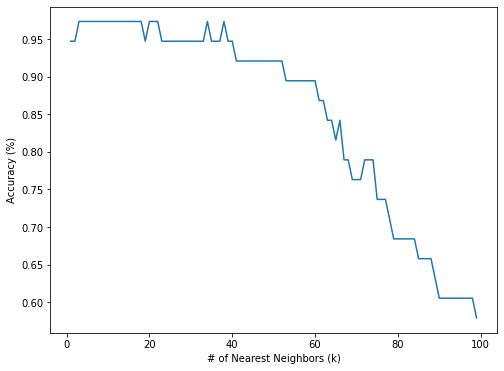

In [13]:
# Obtain accuracy score varying k from 1 to 99

accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

In [25]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier

In [26]:

# K Nearest Neighbors Classification

class K_Nearest_Neighbors_Classifier() :
	
	def __init__( self, K ) :
		
		self.K = K
		
	# Function to store training set
		
	def fit( self, X_train, Y_train ) :
		
		self.X_train = X_train
		
		self.Y_train = Y_train
		
		# no_of_training_examples, no_of_features
		
		self.m, self.n = X_train.shape
	
	# Function for prediction
		
	def predict( self, X_test ) :
		
		self.X_test = X_test
		
		# no_of_test_examples, no_of_features
		
		self.m_test, self.n = X_test.shape
		
		# initialize Y_predict
		
		Y_predict = np.zeros( self.m_test )
		
		for i in range( self.m_test ) :
			
			x = self.X_test[i]
			
			# find the K nearest neighbors from current test example
			
			neighbors = np.zeros( self.K )
			
			neighbors = self.find_neighbors( x )
			
			# most frequent class in K neighbors
			
			Y_predict[i] = mode( neighbors )[0][0]	
			
		return Y_predict
	
	# Function to find the K nearest neighbors to current test example
			
	def find_neighbors( self, x ) :
		
		# calculate all the euclidean distances between current
		# test example x and training set X_train
		
		euclidean_distances = np.zeros( self.m )
		
		for i in range( self.m ) :
			
			d = self.euclidean( x, self.X_train[i] )
			
			euclidean_distances[i] = d
		
		# sort Y_train according to euclidean_distance_array and
		# store into Y_train_sorted
		
		inds = euclidean_distances.argsort()
		
		Y_train_sorted = self.Y_train[inds]
		
		return Y_train_sorted[:self.K]
	
	# Function to calculate euclidean distance
			
	def euclidean( self, x, x_train ) :
		
		return np.sqrt( np.sum( np.square( x - x_train ) ) )


	


In [27]:
# Driver code

def main() :
	
	# Importing dataset
	
	df = pd.read_csv( "diabetes.csv" )

	X = df.iloc[:,:-1].values

	Y = df.iloc[:,-1:].values
	
	# Splitting dataset into train and test set

	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )
	
	# Model training
	
	model = K_Nearest_Neighbors_Classifier( K = 3 )
	
	model.fit( X_train, Y_train )
	
	model1 = KNeighborsClassifier( n_neighbors = 3 )
	
	model1.fit( X_train, Y_train )
	
	# Prediction on test set

	Y_pred = model.predict( X_test )
	
	Y_pred1 = model1.predict( X_test )
	
	# measure performance
	
	correctly_classified = 0
	
	correctly_classified1 = 0
	
	# counter
	
	count = 0
	
	for count in range( np.size( Y_pred ) ) :
		
		if Y_test[count] == Y_pred[count] :
			
			correctly_classified = correctly_classified + 1
		
		if Y_test[count] == Y_pred1[count] :
			
			correctly_classified1 = correctly_classified1 + 1
			
		count = count + 1
		
	print("Accuracy on test set by our model	 : ",(correctly_classified / count ) * 100 )
	print("Accuracy on test set by sklearn model : ",(correctly_classified1 / count ) * 100 )
	

In [28]:
if __name__ == "__main__" : 
      
    main()

Accuracy on test set by our model	 :  63.888888888888886
Accuracy on test set by sklearn model :  63.888888888888886


/home/acr00/vir_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/tmp/ipykernel_3299/1818940012.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Y_predict[i] = mode( neighbors )[0][0]


In [21]:
# Importing libraries

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor



In [22]:
# K Nearest Neighbors Regression

class K_Nearest_Neighbors_Regressor() :
	
	def __init__( self, K ) :
		
		self.K = K
		
	# Function to store training set
		
	def fit( self, X_train, Y_train ) :
		
		self.X_train = X_train
		
		self.Y_train = Y_train
		
		# no_of_training_examples, no_of_features
		
		self.m, self.n = X_train.shape
	
	# Function for prediction
		
	def predict( self, X_test ) :
		
		self.X_test = X_test
		
		# no_of_test_examples, no_of_features
		
		self.m_test, self.n = X_test.shape
		
		# initialize Y_predict
		
		Y_predict = np.zeros( self.m_test )
		
		for i in range( self.m_test ) :
			
			x = self.X_test[i]
			
			# find the K nearest neighbors from current test example
			
			neighbors = np.zeros( self.K )
			
			neighbors = self.find_neighbors( x )
			
			# calculate the mean of K nearest neighbors
			
			Y_predict[i] = np.mean( neighbors )
			
		return Y_predict
	
	# Function to find the K nearest neighbors to current test example
			
	def find_neighbors( self, x ) :
		
		# calculate all the euclidean distances between current test
		# example x and training set X_train
		
		euclidean_distances = np.zeros( self.m )
		
		for i in range( self.m ) :
			
			d = self.euclidean( x, self.X_train[i] )
			
			euclidean_distances[i] = d
		
		# sort Y_train according to euclidean_distance_array and
		# store into Y_train_sorted
		
		inds = euclidean_distances.argsort()
		
		Y_train_sorted = self.Y_train[inds]
		
		return Y_train_sorted[:self.K]
	
	# Function to calculate euclidean distance
			
	def euclidean( self, x, x_train ) :
		
		return np.sqrt( np.sum( np.square( x - x_train ) ) )



In [23]:
# Driver code

def main() :
	
	# Importing dataset
	
	df = pd.read_csv( "salary_data.csv" )

	X = df.iloc[:,:-1].values

	Y = df.iloc[:,1].values
	
	# Splitting dataset into train and test set

	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )
	
	# Model training
	
	model = K_Nearest_Neighbors_Regressor( K = 3 )

	model.fit( X_train, Y_train )
	
	model1 = KNeighborsRegressor( n_neighbors = 3 )
	
	model1.fit( X_train, Y_train )
	
	# Prediction on test set

	Y_pred = model.predict( X_test )
	
	Y_pred1 = model1.predict( X_test )
	
	print( "Predicted values by our model	 : ", np.round( Y_pred[:3], 2 ) )
	
	print( "Predicted values by sklearn model : ", np.round( Y_pred1[:3], 2 ) )
	
	print( "Real values					 : ", Y_test[:3] )





In [24]:
if __name__ == "__main__" :
	
	main()

Predicted values by our model	 :  [ 43024.33 113755.33  58419.  ]
Predicted values by sklearn model :  [ 43024.33 113755.33  58419.  ]
Real values					 :  [ 37731 122391  57081]
